# Obesity Analysis Project

**Authors:** Nneka Asuzu & Ruchira Malhotra  
**Dataset:** [UCI ML Repository – Estimation of Obesity Levels](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

---

## Project Overview

Obesity is a complex public health issue influenced by lifestyle habits, environment, and demographics.  
In this notebook, we use **data visualization** to explore patterns in daily behaviors and personal attributes that may be linked to different obesity levels.

Our goal is to transform a complex dataset into a clear, accessible story, one that reveals how lifestyle choices may align with body weight categories, without jumping to causal conclusions.

---

## Purpose / Business Question

> **What relationships exist between lifestyle habits, demographic factors, and obesity levels, and how can effective data visualization help uncover meaningful patterns for public health understanding?**

The insights gained can help health professionals, educators, and policymakers identify patterns worth deeper investigation or intervention.

---

##  Research Focus

We explore:
- Which **lifestyle habits** (e.g., activity, eating frequency, water intake) and **demographics** (e.g., gender, age) differ across obesity categories  
- What **patterns** emerge through visual analysis, and how they could inform future data-driven health studies  
- How clear visualization and storytelling can make complex data understandable for non-technical audiences  

---

## Notebook Objectives

This notebook will:

1. **Load and inspect** the dataset to check structure, data types, and basic statistics  
2. **Clean and preprocess** the data for consistency and reproducibility  
3. **Explore and visualize** patterns before and after cleaning  
4. **Create visualizations** (histograms, KDE plots, boxplots, heatmaps, etc.) that reveal key relationships  
5. **Integrate storytelling**, turning visuals into insights and clear takeaways  
6. **Save visuals** to the `visuals/` folder for the final report and presentation  

---
  ## About the Dataset

This project uses the **Obesity Levels Dataset** from the **UCI Machine Learning Repository**, which models eating habits, lifestyle patterns, and physical attributes of individuals from **Mexico, Peru, and Colombia**.

- **Records:** 2,111 observations  
- **Features:** 17 attributes related to diet, physical activity, and demographics  
- **Target variable:** `NObeyesdad` — Obesity level with **7 categories**:
  - Insufficient Weight  
  - Normal Weight  
  - Overweight Level I  
  - Overweight Level II  
  - Obesity Type I  
  - Obesity Type II  
  - Obesity Type III  
- **Composition:** Approximately **23% survey data** (real responses) and **77% synthetic data** generated through **SMOTE** to balance class representation.  
  *Interpretation note: results describe dataset patterns, not real-world prevalence.*

---

## Ethical & Privacy Considerations 

Before performing any analysis, it is important to address potential ethical or privacy concerns associated with the dataset and its use.

**1. Data Privacy:**  
The dataset is **synthetic and anonymized**, containing **no personally identifiable information (PII)** such as names, contact details, or IDs. Each record represents an artificial individual, eliminating any risk of re-identification or data exposure.

**2. Sensitive Attributes:**  
Although the dataset includes health-related variables (e.g., weight, diet, and activity level), all values are **aggregated and simulated**. The data does not represent actual medical or personal histories.

**3. Ethical Visualization & Communication:**  
- All plots and labels are **neutral and respectful**, avoiding stigmatizing language.  
- **Colorblind-friendly palettes** are used to maintain accessibility and inclusivity.  
- Analyses emphasize **patterns and insights**, not assumptions about personal behavior.

**4. Transparency and Reproducibility:**  
By clearly documenting data origin, cleaning steps, and ethical safeguards, this project upholds **integrity, fairness, and transparency**, core principles of responsible data science.

### Inclusivity & Diversity in Visualization 

To ensure that all visualizations are inclusive, fair, and representative, the following best practices were applied:

- **Accessible Design:** Colorblind-safe palettes, high contrast, and clear labeling make visuals readable by all audiences.  
- **Diverse Representation:** Demographic attributes (e.g., age, gender) are shown without bias or stereotype reinforcement. All categories are presented with equal visual weight.  
- **Cultural Sensitivity:** Since the dataset draws from multiple Latin American countries, interpretations avoid overgeneralization or cultural assumptions.  
- **Ethical Language:** All titles and captions use neutral, respectful terms, focusing on behaviors and patterns rather than judgments.  
- **Transparency:** Synthetic data and SMOTE balancing are disclosed, promoting fairness and interpretive honesty.

These practices help ensure that the visual story is **inclusive, unbiased, and respectful of diversity** while remaining analytically rigorous.


---

##  Data Story Preview

Behind every data point is a person and their daily choices.  
By visualizing habits like eating frequency, activity, and water intake across different weight categories, we aim to uncover subtle patterns:  
- Do people who snack frequently cluster in certain obesity levels?  
- How does transport mode or physical activity relate to weight distribution?  

Through these visuals, we’ll build a **data narrative** that’s evidence-based and easy to understand, showing how individual behaviors form population-level trends.

---

## Notebook Outline

| Section | Description |
|----------|--------------|
| **1. Setup & Imports** | Import required libraries and define style settings |
| **2. Load & Inspect Data** | Load dataset, check structure, data types, and missing values |
| **3. Data Cleaning** | Standardize types, handle duplicates, and ensure reproducibility |
| **4. Exploratory Data Analysis (EDA)** | Create numeric and categorical visualizations |
| **5. Correlation & Relationships** | Examine how features relate to obesity categories |
| **6. Data Storytelling & Visual Explanations** | Combine visuals and narrative insights |
| **7. Save & Document Visuals** | Store final plots and prepare outputs for README/report |

---

*Let’s begin by importing the necessary libraries and loading our dataset.*



# Step 1: Setup & Imports
 -------------------------------

In [2]:
# Import core libraries for data manipulation and visualization

import pandas as pd         # Data handling and analysis
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt   # Static visualization
import seaborn as sns             # Statistical and aesthetic visualization

# Visualization Theme & Display Configuration
# --------------------------------------------
# Apply a clean, accessible style for consistency and readability
sns.set_theme(style="whitegrid", palette="Set2")   # Colorblind-friendly palette
plt.rcParams['figure.dpi'] = 120                   # Sharper, high-resolution visuals

# Configure pandas display options for easier data inspection
pd.set_option('display.max_columns', None)

# Reproducibility Setup
# ----------------------
# Set a universal random seed to ensure consistent results in any stochastic process.
# While this EDA is deterministic (no random sampling or model training involved),
# setting a seed now establishes a reproducible foundation for future work.
np.random.seed(103)

"""
📘 Reproducibility Note:
Although the exploratory data analysis (EDA) process here is fully deterministic,
a random seed (`np.random.seed(103)`) is still defined. This is considered a best practice 
for any data science workflow, as it guarantees reproducibility in later stages, 
such as data sampling, model training, or randomized visualization effects.
"""


'\n📘 Reproducibility Note:\nAlthough the exploratory data analysis (EDA) process here is fully deterministic,\na random seed (`np.random.seed(103)`) is still defined. This is considered a best practice \nfor any data science workflow, as it guarantees reproducibility in later stages, \nsuch as data sampling, model training, or randomized visualization effects.\n'

# Step 2: Data Quality Assessment
 -------------------------------
*Ensuring data integrity before analysis*

Before searching for insights, we first confirm that our dataset is reliable, consistent, and free of hidden errors. This assessment ensures that subsequent visualizations and findings are meaningful and trustworthy.

**Diagnosis**
- Checked for missing values using `df.info()` — result: **0 missing values**
- Detected **24 duplicate entries** across all features

**Preliminary Actions**
- Noted duplicates for removal in the cleaning step
- Verified categorical and numeric columns for consistency and proper types

In [7]:
# Define path to the dataset 
csv_path = "../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv"

# Load CSV into a pandas DataFrame
data_csv = pd.read_csv(csv_path)

# Display dataset metadata and structure
print("Columns in dataset:", data_csv.columns.tolist())
print("\n Dataset Overview:")
data_csv.info()

# Preview the first few rows
data_csv.head()


Columns in dataset: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOK

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Step 2a: Feature Overview (Quick Reference)
*Some column names in the dataset are abbreviated or coded.*

This quick-reference table decodes them, providing **clear descriptions** and **visual cues** to support intuitive understanding before EDA.

<table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    <th>Possible Values / Scale</th>
  </tr>
  <tr>
    <td><b>FAVC</b></td>
    <td>Frequent consumption of high-calorie food</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td><b>FCVC</b></td>
    <td>Frequency of vegetable consumption</td>
    <td>1 = Never ❌, 2 = Sometimes ⚠️, 3 = Always ✅</td>
  </tr>
  <tr>
    <td><b>NCP</b></td>
    <td>Number of main meals per day</td>
    <td>1–2 🍽, 3 🍽🍽🍽, &gt;3 🍽🍽🍽🍽</td>
  </tr>
  <tr>
    <td><b>CAEC</b></td>
    <td>Snacking between meals</td>
    <td>No ❌, Sometimes ⚠️, Frequently 🔄, Always ✅</td>
  </tr>
  <tr>
    <td><b>SMOKE</b></td>
    <td>Smoking status</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td><b>CH2O</b></td>
    <td>Daily water intake (liters)</td>
    <td>&lt;1 💧, 1–2 💧💧, &gt;2 💧💧💧</td>
  </tr>
  <tr>
    <td><b>SCC</b></td>
    <td>Monitoring calorie consumption</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td><b>FAF</b></td>
    <td>Physical activity frequency (days/week)</td>
    <td>None ❌, 1–2 ⚠️, 2–4 🔄, 4–5 ✅</td>
  </tr>
  <tr>
    <td><b>TUE</b></td>
    <td>Technology usage time (hours/day)</td>
    <td>0 = 0–2 ⏱, 1 = 3–5 ⏱⏱, 2 = &gt;5 ⏱⏱⏱</td>
  </tr>
  <tr>
    <td><b>CALC</b></td>
    <td>Alcohol consumption frequency</td>
    <td>None ❌, Sometimes ⚠️, Frequently 🔄, Always ✅</td>
  </tr>
  <tr>
    <td><b>MTRANS</b></td>
    <td>Primary mode of transportation</td>
    <td>🚗 Automobile, 🏍 Motorbike, 🚲 Bike, 🚌 Public Transport, 🚶 Walking</td>
  </tr>
  <tr>
    <td><b>NObeyesdad</b></td>
    <td>Obesity level category (target)</td>
    <td>Insufficient, Normal, Overweight I/II, Obesity I/II/III</td>
  </tr>
</table>

---

**Notes:**  
- Icons provide a **quick visual cue** for interpreting each response.  
- Features such as FCVC, NCP, FAF, and TUE are categorical variables recorded on numeric scales representing frequency or intensity.
- Other lifestyle features (e.g., CAEC, CALC) are categorical with text labels.
- Binary features (like SMOKE, SCC, FAVC) are Yes/No indicators.
- This table acts as a shared **data dictionary**, helping team members or readers quickly map coded survey responses to real-world meanings.
---

***Target Variable: NObeyesdad (Obesity Level)***

The **`NObeyesdad`** column represents each individual’s **obesity level category**, derived from **Body Mass Index (BMI)** according to **World Health Organization (WHO)** and **Mexican Normativity** standards.  
This variable serves as the **target label** for future predictive modeling tasks.

| Obesity Class           | Description           | BMI Range (kg/m²) |
| ----------------------- | --------------------- | ----------------- |
| **Insufficient Weight** | Underweight           | < 18.5            |
| **Normal Weight**       | Healthy weight        | 18.5 – 24.9       |
| **Overweight Level I**  | Slightly overweight   | 25 – 26.9         |
| **Overweight Level II** | Moderately overweight | 27 – 29.9         |
| **Obesity Type I**      | Mild obesity          | 30 – 34.9         |
| **Obesity Type II**     | Moderate obesity      | 35 – 39.9         |
| **Obesity Type III**    | Severe obesity        | ≥ 40              |

---

**Source & Context**
Mendoza-Palechor, F., & de la Hoz Manotas, A. (2019).  
*Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru, and Mexico.*  
_Data in Brief, 25_, 104344. [DOI link](https://doi.org/10.1016/j.dib.2019.104344)

> **Note:** Approximately **77% of the dataset** was synthetically generated using the **SMOTE (Synthetic Minority Oversampling Technique)** to balance obesity class representation, while **23%** comes from real survey responses.  
> This means patterns and distributions may appear more uniform than in purely real-world data, a crucial factor to consider when interpreting results.

## Step 2b: Data Quality Rationale:  Pre-Cleaning Visualizations Skipped

A visualization on uncleaned data was intentionally **skipped** for three main reasons:

1. **Redundancy:** The dataset was already very clean, only about **1.1 %** of rows were duplicates. Pre- and post-cleaning plots would look almost identical.
2. **Efficiency:** All necessary data-quality checks (e.g., `.info()`, `.duplicated()`) reliably identified missing or repeated values, making diagnostic plots unnecessary.
3. **Narrative Integrity:** The story we present should rest on **trustworthy data**. By showing only post-cleaning visuals, our analysis stays clear, credible, and focused on insights rather than raw noise.

In short, skipping uncleaned plots keeps our narrative efficient, reproducible, and transparent, reflecting a professional data science workflow.

## Step 2c: Inspect Duplicate Rows
  *Before cleaning the dataset, we inspected for duplicate rows to ensure data quality.*
  
* Result: 24 duplicates were found (≈ 1.1 % of total records).
* Duplicates likely stem from repeated survey submissions during data collection

In [ ]:
# Count duplicate rows (excluding first occurrences)
num_duplicates_only = data_csv.duplicated().sum()
print(f"Duplicate rows (excluding first occurrences): {num_duplicates_only}")

# View all duplicates including originals
duplicate_rows_all = data_csv[data_csv.duplicated(keep=False)].sort_values(by=list(data_csv.columns))

if not duplicate_rows_all.empty:
    print("\nDuplicate rows (including originals):")
    print (duplicate_rows_all)

Duplicate rows (excluding first occurrences): 24

Duplicate rows (including originals):


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
295,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
282,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
523,Female,21.0,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
527,Female,21.0,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
659,Female,21.0,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
663,Female,21.0,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


## Step 2d: Missing-Value Check
We confirmed whether any null or empty entries existed.
* Result: No missing values detected across all 17 columns.
* This strengthens confidence in the dataset’s consistency.

In [11]:
# Check for missing values before cleaning
print("\nMissing values by column (before cleaning):")
display (data_csv.isnull().sum())


Missing values by column (before cleaning):


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Step 2e: Descriptive Statistics for Numeric Features
Understanding numeric feature distributions helps guide cleaning and later visualization.

In [10]:
# Descriptive statistics for numeric features
print("\nDescriptive statistics for numeric features:")
display (data_csv.describe())


Descriptive statistics for numeric features:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


###  Descriptive Statistics (Key Observations):

**Purpose:** Understand distributions, identify potential anomalies, and guide data cleaning.

**Numeric Features:**

1. **Age**  
   - Range: 14–61 years, mean ~24.3, median ~22.8  
   - Dataset skewed toward younger participants (14–30 years)  
   - No missing values

2. **Height (m)**  
   - Range: 1.45–1.98, mean ~1.70  
   - Low variability (std ~0.093)  
   - Minimum of 1.45 m is unusually short; may represent young teens or check data entry

3. **Weight (kg)**  
   - Range: 39–173, mean ~86.6, median 83  
   - High standard deviation (~26.2) indicates possible outliers in higher weight range
   -  Some extreme values (e.g., 173) may be potential outliers.

4. **FCVC (Vegetable Intake Frequency, 1–3 scale)**  
   - Mean ~2.42, median ~2.38  
   - Most participants eat vegetables “sometimes” to “always”  
   - Values within expected range

5. **NCP (Number of Main Meals, 1–4 scale)**  
   - Mean ~2.69, median 3  
   - Majority have around 3 meals per day; some have more than 3

6. **CH2O (Daily Water Intake, 1–3 scale)**  
   - Mean ~2.01, median 2  
   - Most drink 1–2 liters per day

7. **FAF (Physical Activity Frequency, 0–3 scale)**  
   - Mean ~1.01, median 1  
   - Many participants have low to moderate activity; 25th percentile near 0 indicates some do almost no activity

8. **TUE (Time Using Technology, 0–2 scale)**  
- Mean ~0.66, median ~0.63  
- Most spend less than 3 hours/day; maximum indicates some >5 hours/day  
- Most participants spend 0–2 hours/day using technology (coded 0), while some spend 3–5 hours/day (coded 1) or more than 5 hours/day (coded 2)  

**Visual mapping of codes:**  
- 0 = 0–2 hours/day  
- 1 = 3–5 hours/day ⌚  
- 2 = More than 5 hours/day ⌚⌚


**Summary / Potential Anomalies:**  
- Skew toward younger participants  
- Weight shows high variability and potential outliers  
- Physical activity is low for many participants  
- No missing values in numeric features

### **Outcome**
The dataset is ready for thorough cleaning and preprocessing in **Step 3**, which will remove duplicates, standardize formats, and prepare the data for accurate exploration and visualization.

## Step 3: Data Cleaning and Preparation
 -------------------------------
 *Even though the dataset is nearly pristine, we perform systematic cleaning for reproducibility and professional rigor*

* Having assessed the data quality in Step 2, we now perform the necessary cleaning and preprocessing to ensure that all subsequent analyses are reliable and reproducible.

### 3a. Standardize Categorical Columns
*Ensures consistency across all text fields.*
* Stripped extra spaces and unified capitalization for consistency across all categorical features
*  Ensures labels are comparable and visualizations are clear

In [ ]:
# Define categorical features
categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
    'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

# Standardize categorical text
# Remove extra spaces and fix inconsistent capitalization
for col in categorical_features + ['NObeyesdad', 'FAVC', 'SMOKE', 'SCC']:
    data_csv[col] = data_csv[col].astype(str).str.strip().str.capitalize()

print("Categorical columns standardized.\n")

Categorical columns standardized.



### 3b: Ensure Numeric Columns Are Correct
* Converted numeric columns to proper numeric types
* Checked for any unexpected non-numeric entries
* Ensures calculations and visualizations are accurate
* Result: No non-numeric entries were found, confirming type integrity.

In [37]:
# Define numeric features

numeric_features = [
    'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'
]

# Convert numeric columns
for col in numeric_features:
    data_csv[col] = pd.to_numeric(data_csv[col], errors='coerce')  # Convert invalid to NaN

# Check datatypes
print("Numeric column data types:")
print(data_csv[numeric_features].dtypes)

# Optional: check for newly introduced NaNs
print("\nMissing values in numeric columns after type conversion:")
print(data_csv[numeric_features].isnull().sum())

Numeric column data types:
Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object

Missing values in numeric columns after type conversion:
Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: int64


### 3c: Handle Missing Values (Safeguard)
* Dataset contained no missing values, but any missing entries would be dropped or imputed
* Guarantees robust, reproducible analysis
* Result: No rows dropped; dataset remains complete.

In [38]:
#  Handle missing values if any (optional safeguard) 
# (Dataset likely has none, but it's best practice to handle gracefully)
data_csv = data_csv.dropna().reset_index(drop=True)
print("\nMissing values handled (if any were present).")


Missing values handled (if any were present).


### 3d: Remove Duplicate Rows
* Removed **24 duplicate entries**, retaining **2,087 unique records**
*  Ensures statistical validity and prevents bias in visualizations
*  Result: After cleaning, we retained 2,087 unique records, confirming a fully deduplicated dataset.

In [12]:
# Remove duplicates
initial_rows = data_csv.shape[0]
data_csv = data_csv.drop_duplicates().reset_index(drop=True)
final_rows = data_csv.shape[0]

print(f"\nRemoved {initial_rows - final_rows} duplicate rows (if any).")

# Verify duplicates and missing values
print("\nMissing values after cleaning:")
print (data_csv.isnull().sum())

print("\nNumber of duplicate rows after cleaning:", data_csv.duplicated().sum())


Removed 24 duplicate rows (if any).

Missing values after cleaning:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Number of duplicate rows after cleaning: 0


### 3e: Save the Cleaned Dataset
*  Created `data_clean` as a working copy for post-cleaning analysis
*  Saved to `../data/processed/ObesityDataSet_cleaned.csv` for reproducibility

In [13]:
data_clean = data_csv.copy()   # Create cleaned dataset copy
data_clean.to_csv("../data/processed/ObesityDataSet_cleaned.csv", index=False)   # Save cleaned dataset to CSV
print("Cleaned dataset saved for post-cleaning visualizations.")

Cleaned dataset saved for post-cleaning visualizations.


### 3f: Ready for Discovery

Our dataset now reflects accurate, consistent, and reproducible data from 2,087 individuals across Colombia, Peru, and Mexico.
Every record has been validated, no missing values, no duplicates, and harmonized categorical fields.
With this foundation, we can now visualize meaningful lifestyle patterns and uncover how daily habits relate to obesity levels.

# Step 4: Exploratory Data Analysis (EDA)
 -------------------------------

Purpose: Understand distributions, relationships, and key drivers of obesity levels.

We use cleaned, verified data to ensure accurate interpretations. Our story is structured into five chapters, each highlighting a distinct aspect of the dataset.

* Accessibility & Storytelling Notes:
   * Colorblind-safe palettes used.
   * Combined plots for readability and efficiency
   * Titles, axis labels, and figure sizes improve accessibility.
   * Provides narrative for later analysis and modeling: highlights which features show patterns or potential issues.

## Step 4a : Chapter 1: The Main Character (NObeyesdad)

*Graph 1: Distribution of Obesity Levels*

C:\Users\User\AppData\Local\Temp\ipykernel_19416\2547809223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


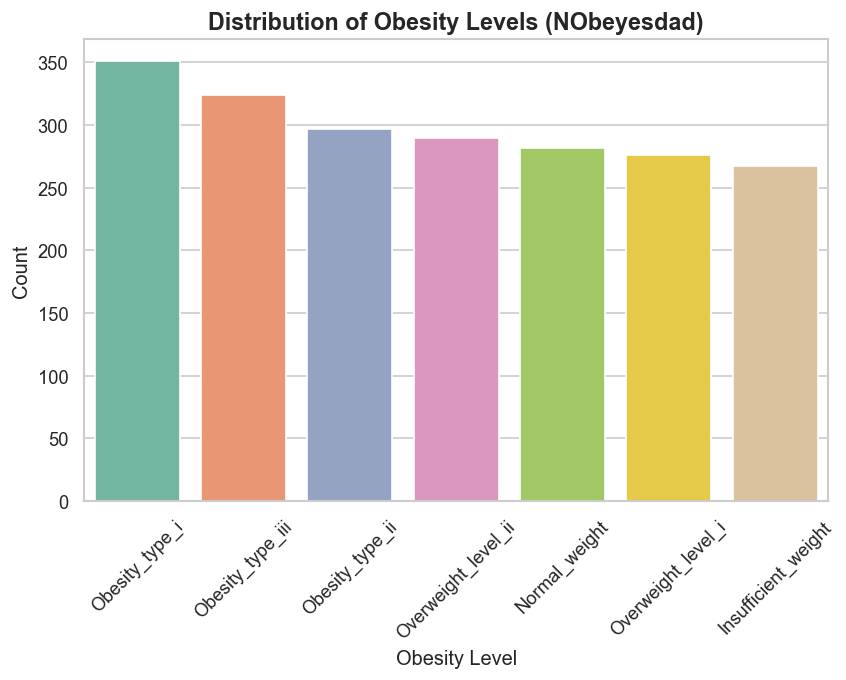

In [41]:
# Plot: Count plot for target variable NObeyesdad
plt.figure(figsize=(8,5))  # Set figure size
sns.countplot(
    x='NObeyesdad',                # Target variable
    data=data_clean,               # Use cleaned dataset
    order=data_clean['NObeyesdad'].value_counts().index,  # Order by frequency
    palette='Set2'                 # Accessible color palette
)
plt.title("Distribution of Obesity Levels (NObeyesdad)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Obesity Level")

# Save figure to visuals folder
plt.savefig("../visuals/graph1_nobeyesdad_distribution.png", bbox_inches='tight')
plt.show()



* Interpretation / Data Story:

  * Reveals class balance of obesity levels.
  * "Obesity Type I" is the most common category.
  * Distribution is reasonably balanced, meaning each class has enough samples for analysis.

* Why this chart: Count plots are ideal for categorical variables; they show frequency clearly and highlight any imbalance.


## Step 4b:  Chapter 2: The Context (Demographics)
*Graph 2: Distribution of Numeric Features*

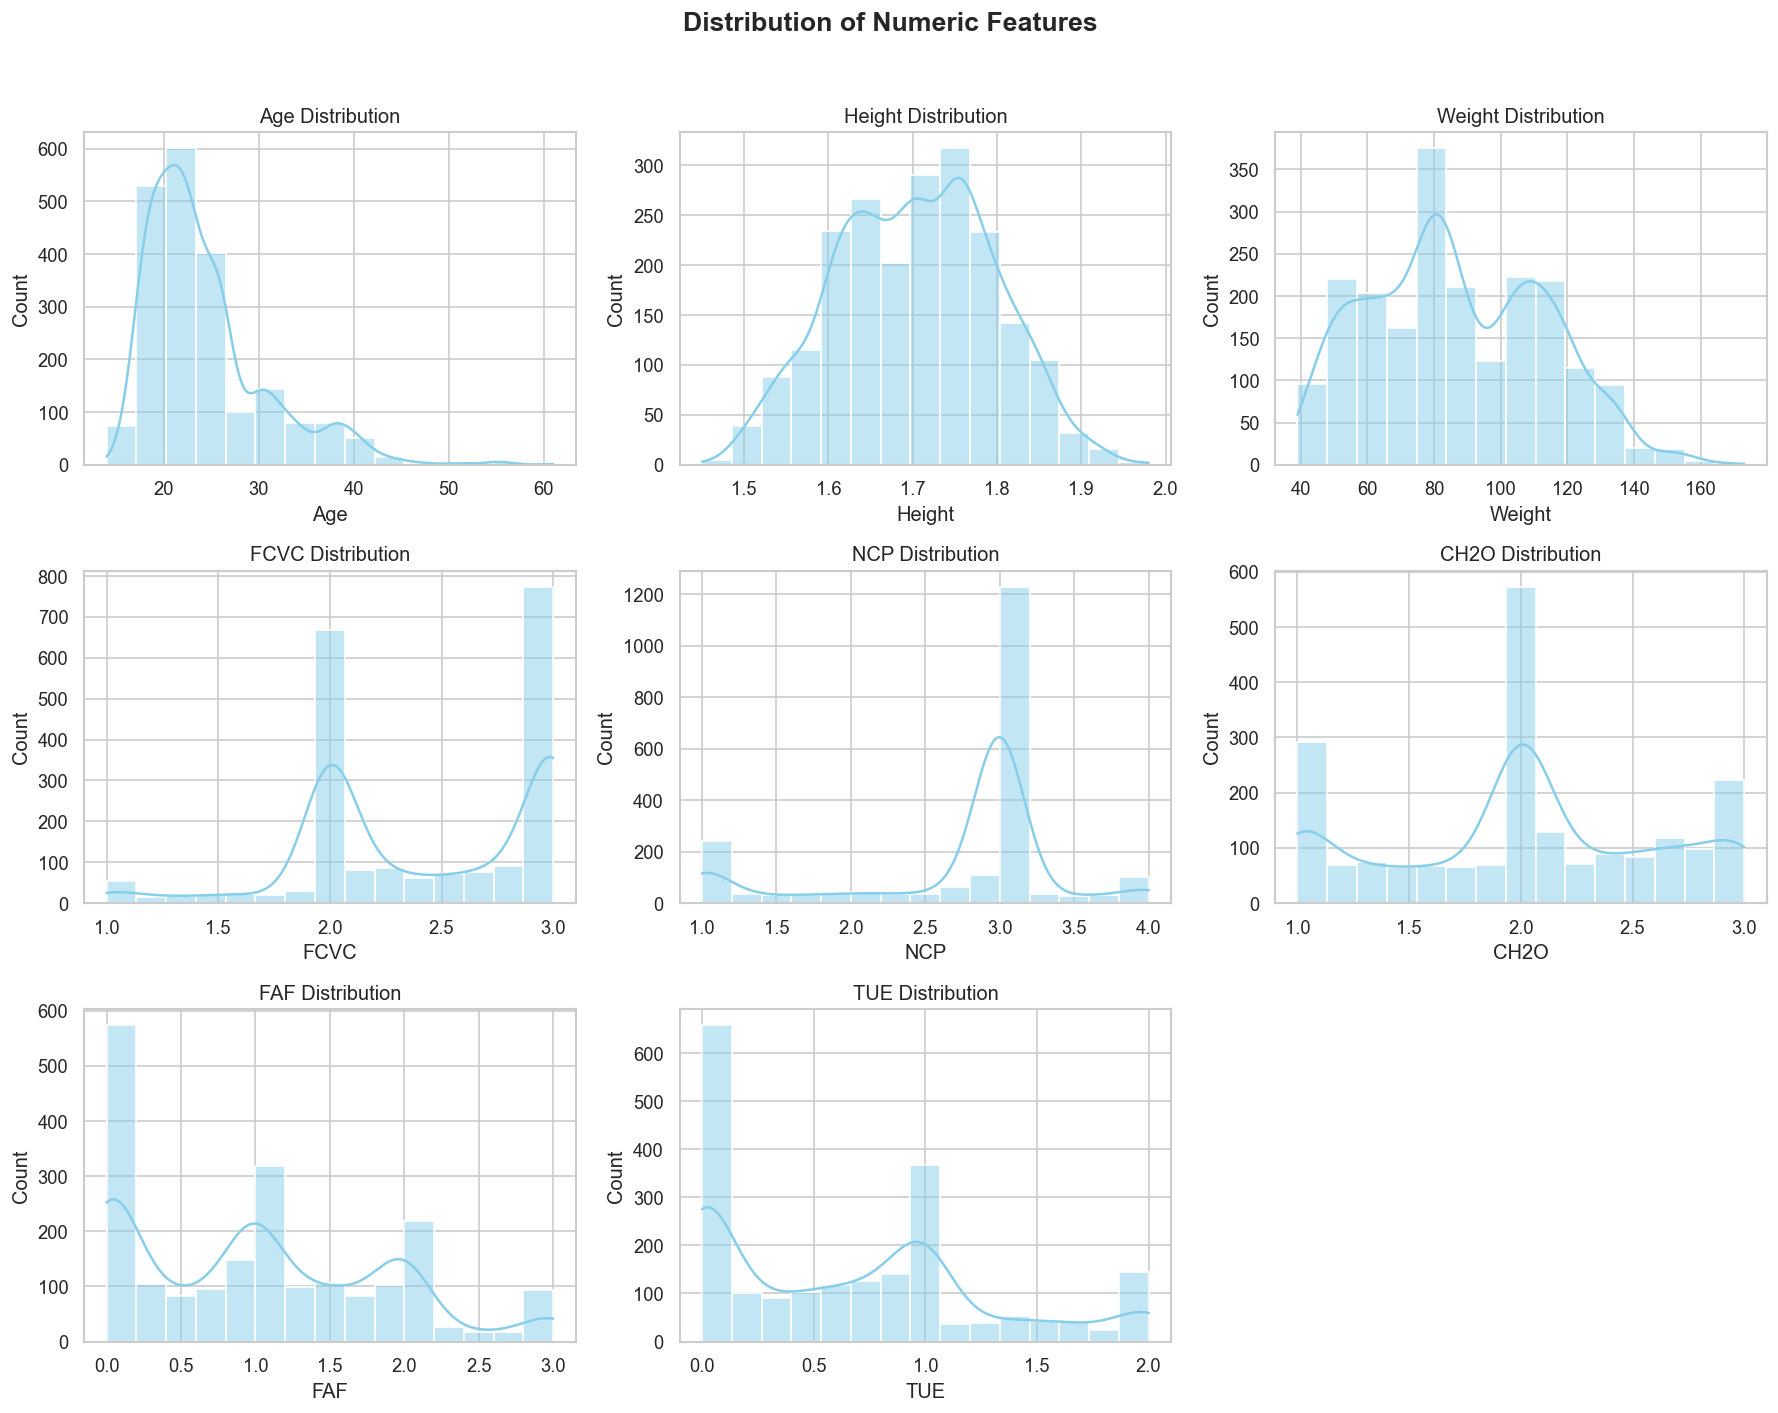

In [42]:
# List of numeric features
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a grid of subplots (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through each numeric feature to plot histogram
for i, feature in enumerate(numeric_features):
    sns.histplot(
        data_clean[feature],  # Data for the feature
        bins=15,              # Number of histogram bins
        kde=True,             # Overlay kernel density estimate
        ax=axes[i],           # Plot on corresponding subplot
        color='skyblue'       # Histogram color
    )
    axes[i].set_title(f'{feature} Distribution', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove any empty subplots if features < total axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title for the figure
plt.suptitle('Distribution of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure
plt.savefig("../visuals/graph2_numeric_features_distribution.png", bbox_inches='tight')

# Show the plot
plt.show()


* Interpretation / Data Story:

  * Age: Skewed toward younger adults (20–30 years), setting demographic context.
  * Weight: Wide range (39–173 kg), potential outliers at high weights.
  * Height: Relatively consistent (1.45–1.98 m).
  * FAF (Physical Activity): Many participants show low activity.
  * TUE (Screen Time): Most spend 0–2 hours/day; some >5 hours.
  * Other numeric features (FCVC, NCP, CH2O) show slight variation, less influential in predicting obesity.

* Why this chart: Histograms summarize distributions efficiently and highlight potential outliers or patterns.
    * Simplicity: They provide the most basic and intuitive understanding of a numerical variable's distribution (where is the data and how wide is the spread?).
    * Pre-Processing Check: They are essential for checking if data is normally distributed (bell curve) or skewed, which informs later statistical testing and modeling choices.
    * Outlier Detection: The long, thin tails on the distributions (like for Weight) immediately flag values that may need further investigation

### Step 4c: Chapter 3: Feature Distributions by Obesity Level.
*Graph 3: Boxplots of Numeric Features by Obesity Level*

C:\Users\User\AppData\Local\Temp\ipykernel_19416\759193158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_19416\759193158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_19416\759193158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_19416\759193158.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

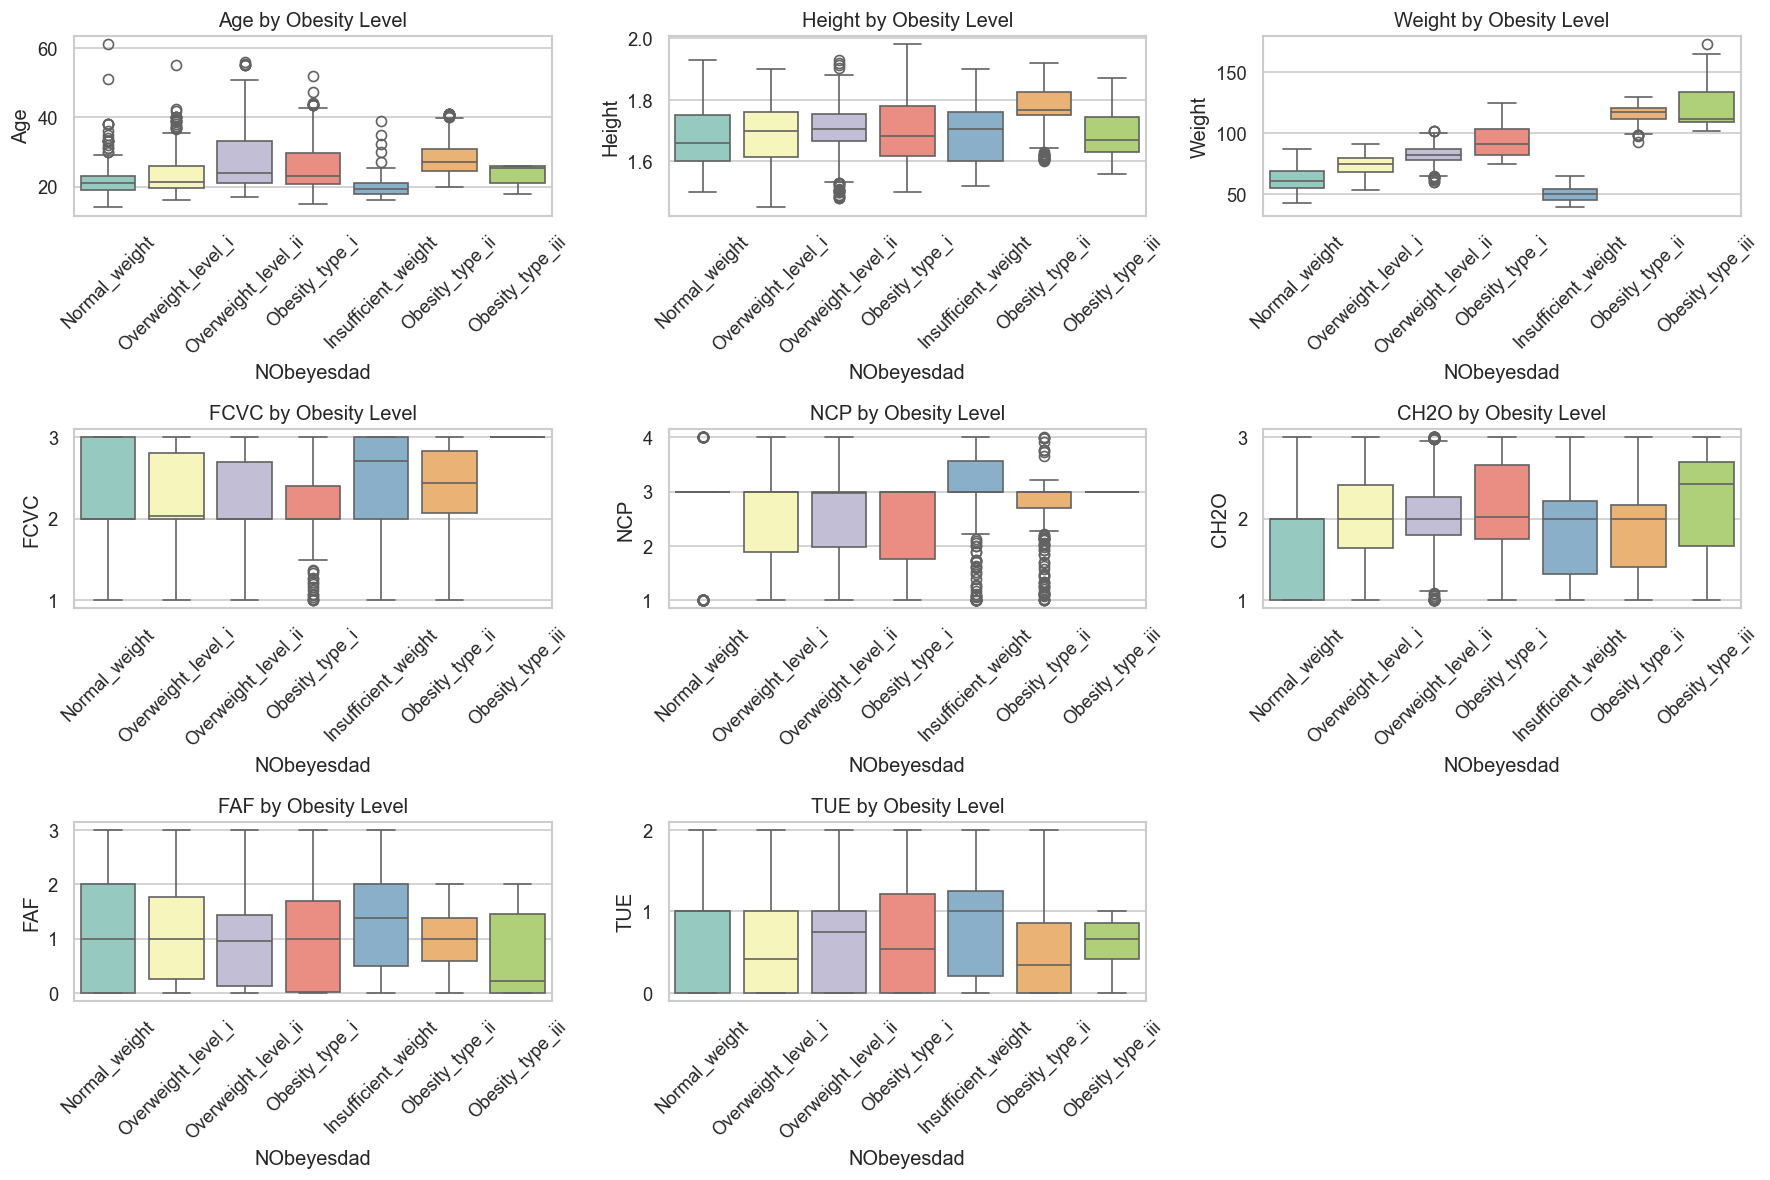

In [43]:
# Create boxplots of numeric features grouped by obesity level
plt.figure(figsize=(15,10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3,3,i)   # Arrange subplots in a 3x3 grid
    sns.boxplot(
        x='NObeyesdad',  # Categorical target
        y=feature,        # Numeric feature
        data=data_clean,  
        palette='Set3'    # Accessible colors
    )
    plt.title(f"{feature} by Obesity Level")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("../visuals/graph3_boxplots_numeric_by_obesity.png", bbox_inches='tight')
plt.show()


* Interpretation / Data Story:

    * Weight: Strongest predictor; median increases sharply with obesity level.
    * Age: Gradual increase across obesity categories.
    * FAF (Activity): Inverse relationship; lower activity with higher obesity.
    * TUE (Screen Time): Positive trend; higher obesity, more screen time.
    * Other features (Height, FCVC, NCP, CH2O): Minimal variation; less influential.

* Why this chart: Boxplots efficiently compare distributions across categorical groups, highlighting central tendencies and spread.

## Step 4d: Chapter 5: Feature Relationships 
Graph 4: Correlation Heatmap


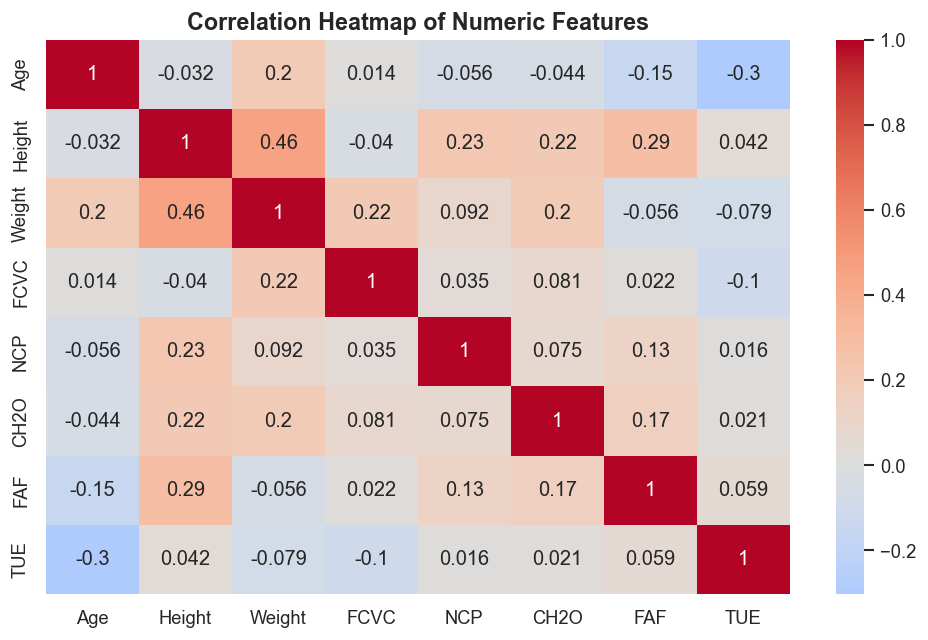

In [44]:
plt.figure(figsize=(10,6))

# Compute correlation matrix and plot heatmap
sns.heatmap(
    data_clean[numeric_features].corr(),  # Correlation matrix
    annot=True,                           # Show correlation values
    cmap='coolwarm',                      # Diverging color palette
    center=0                              # Center color at 0
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight='bold')
plt.savefig("../visuals/graph4_correlation_heatmap.png", bbox_inches='tight')
plt.show()


* Interpretation:

   * Weight strongly correlated with BMI (expected).
   * Weight inversely correlated with physical activity.
   * Screen time positively correlated with weight and sedentary behavior.

* Why this chart: Heatmaps visualize pairwise relationships among numeric features and highlight potential multicollinearity.

### Step 4e: Chapter 5: Multivariate Relationships 
Graph 5: Pairplot of Selected Numeric Features

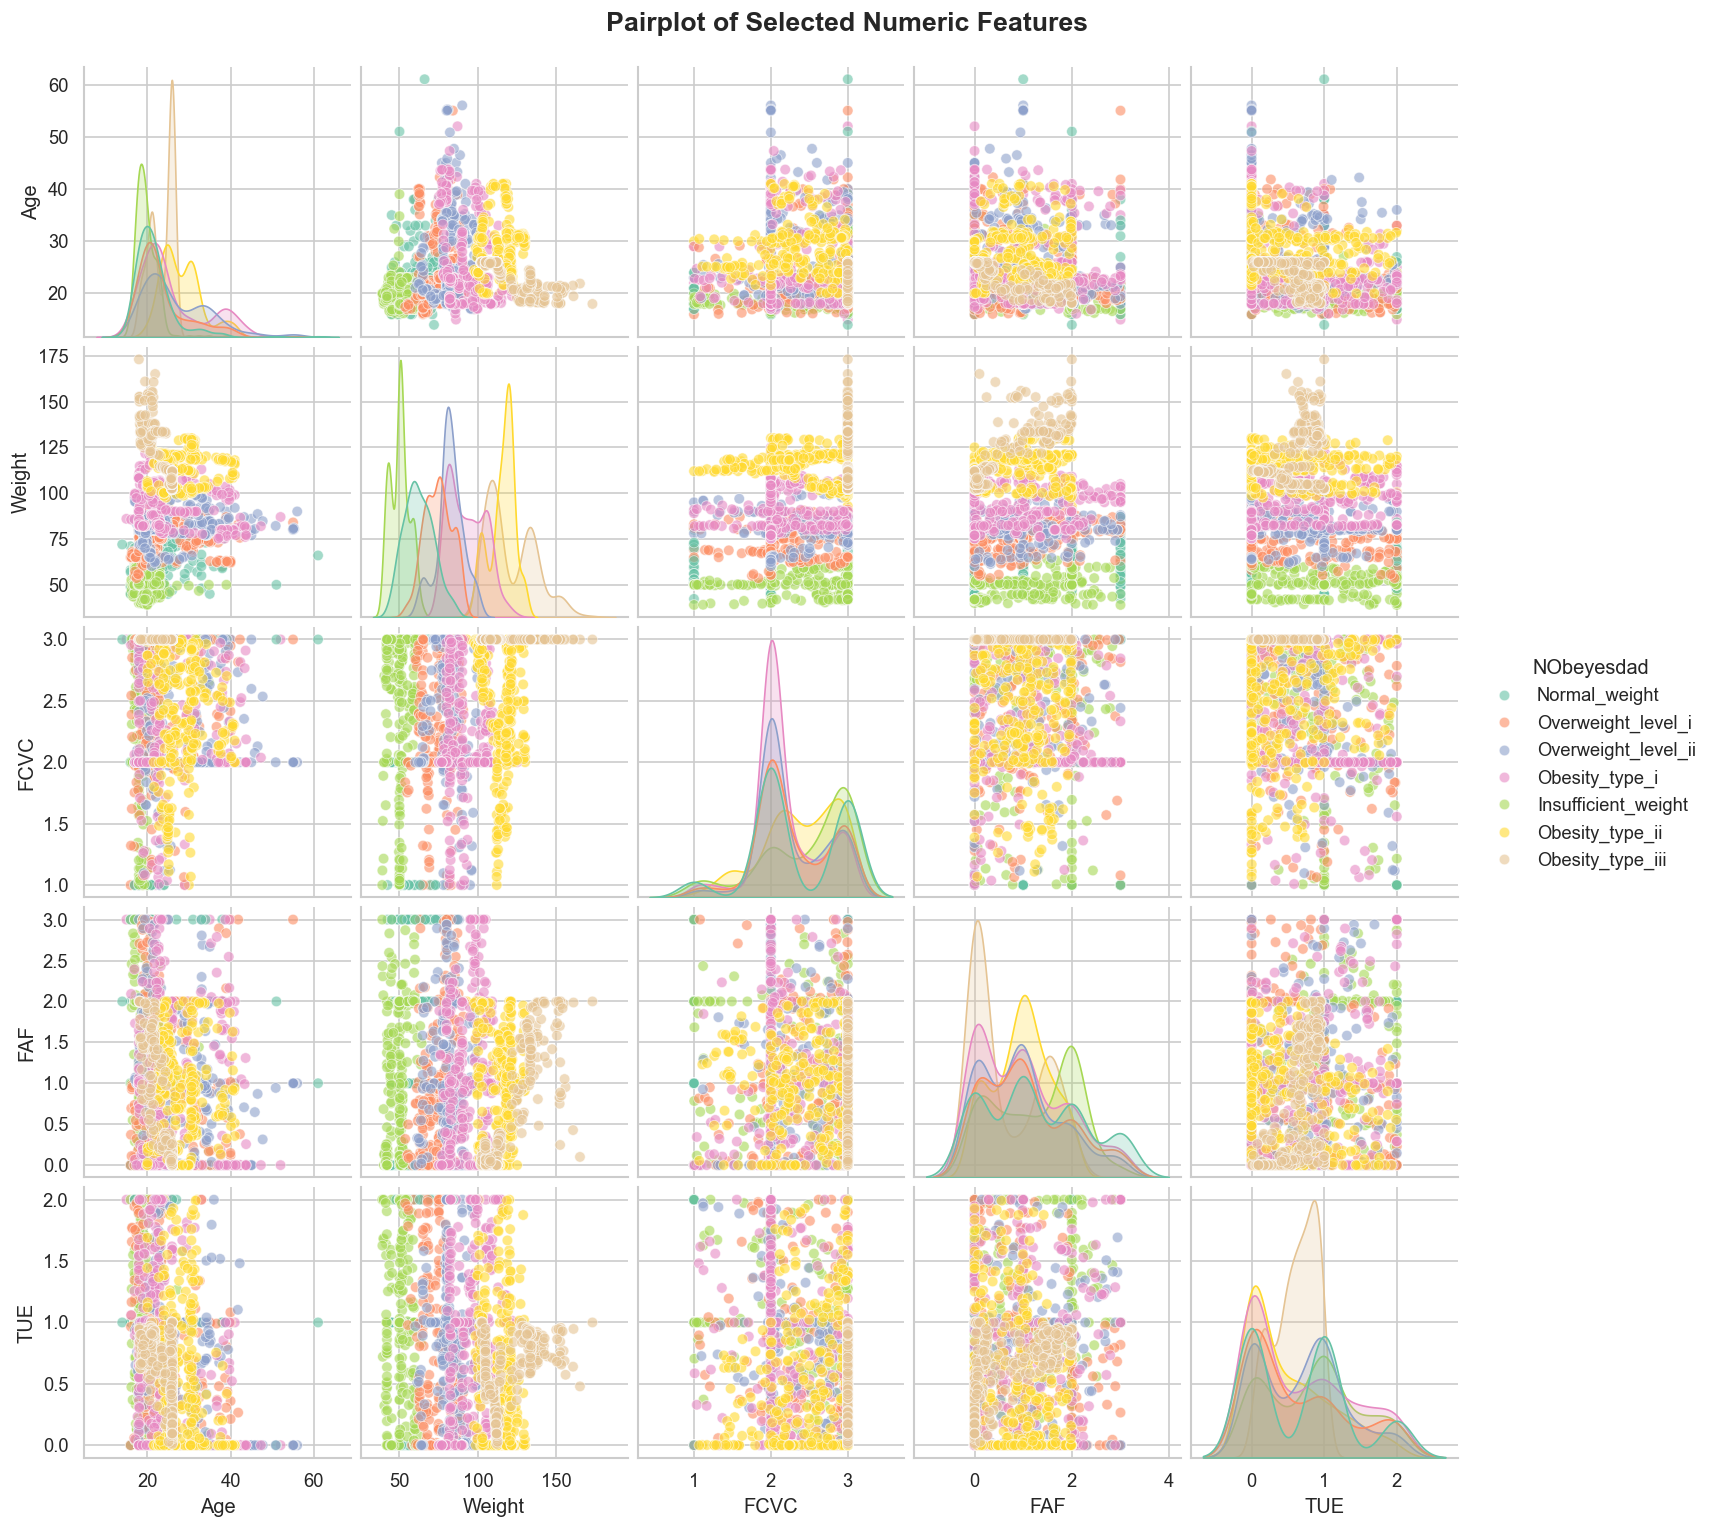

In [45]:
# Select numeric features for pairplot
selected_features = ['Age', 'Weight', 'FCVC', 'FAF', 'TUE']

# Pairplot with KDE on diagonals, colored by obesity level
sns.pairplot(
    data=data_clean[selected_features + ['NObeyesdad']],  # Include target variable
    hue='NObeyesdad', 
    palette='Set2', 
    diag_kind='kde', 
    plot_kws={'alpha':0.6, 's':40}  # Transparency and point size
)

plt.suptitle("Pairplot of Selected Numeric Features", fontsize=16, fontweight='bold', y=1.02)
plt.savefig("../visuals/graph5_pairplot_selected_features.png", bbox_inches='tight')
plt.show()


* Interpretation / Data Story:

   * Confirms strongest patterns: weight and activity are primary differentiators.
   * FCVC shows minor influence.
   * Multivariate relationships and potential clusters are visible.

Why this chart: Pairplots visualize bivariate relationships and highlight trends or clusters across multiple features.

## Conclusion: The Final Data Story


### Key Takeaways:

* Weight: Strongest predictor of obesity.
* Physical Activity (FAF) and Screen Time (TUE): Critical behavioral factors.
* Age: Gradual increase across obesity levels.
* Gender: Uneven distribution across categories.
* High-Calorie Food (FAVC) and Alcohol (CALC): Less discriminative.
* Other features (Height, Water, Vegetable intake, Number of meals): Minimal impact.

Overall Story:
Obesity in this population is primarily shaped by weight, activity, and sedentary habits. Age and gender provide context. Behavioral interventions should target increasing physical activity and reducing sedentary time, as dietary factors alone do not fully explain obesity patterns.

# Step 5: Feature / Target Separation (Optional: For Modeling or Further Analysis)
 -------------------------------

**Purpose:** Prepare the feature matrix (X) and target vector (y) for modeling or other analyses requiring separate inputs.

**Note:** This step is optional for a visualization-focused workflow but is included for completeness and reproducibility.

In [ ]:
# Features: all columns except the target variable
X = data_csv.drop(columns=['NObeyesdad'])

# Target: obesity level category
y = data_csv['NObeyesdad']

# Quick preview of features and target
print("\nPreview of features (X):")
print (X.head())

print("\nPreview of target (y):")
print (y.head())


# Notes:

# X contains all predictive features (demographics, lifestyle habits, numeric and categorical variables).

# y contains the target variable, NObeyesdad, representing obesity levels.

# This separation is standard for supervised learning tasks.


Preview of features (X):


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,Yes,No,2.0,3.0,Sometimes,No,2.0,No,0.0,1.0,No,Public_transportation
1,Female,21.0,1.52,56.0,Yes,No,3.0,3.0,Sometimes,Yes,3.0,Yes,3.0,0.0,Sometimes,Public_transportation
2,Male,23.0,1.80,77.0,Yes,No,2.0,3.0,Sometimes,No,2.0,No,2.0,1.0,Frequently,Public_transportation
3,Male,27.0,1.80,87.0,No,No,3.0,3.0,Sometimes,No,2.0,No,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,No,No,2.0,1.0,Sometimes,No,2.0,No,0.0,0.0,Sometimes,Public_transportation



Preview of target (y):


0          Normal_weight
1          Normal_weight
2          Normal_weight
3     Overweight_level_i
4    Overweight_level_ii
Name: NObeyesdad, dtype: object

# Final Conclusion & Actionable Data Story
Purpose: Summarize the EDA insights in a clear, executive-ready format. This final story provides actionable takeaways and sets the stage for predictive modeling.

Our visual exploration answered the business question by confirming that obesity is shaped by **demographics**, **daily habits**, and particularly **behavioral factors**.

### Key Findings:

1. **Activity/Inactivity Link:**  
   - Physical Activity (FAF) shows a **clear inverse relationship** with obesity.  
   - Screen Time (TUE) is **positively associated** with obesity.  
   - These behavioral factors are the most actionable insight.

2. **Demographic Segmentation:**  
   - **Age:** Median age increases steadily with obesity severity.  
   - **Gender:** There is a pronounced split in severe categories:  
     - Obesity Type II is **male-dominated**.  
     - Obesity Type III is **female-dominated**.

3. **Weight as Primary Indicator:**  
   - Weight strongly differentiates obesity levels (expected, as it contributes to BMI).  

4. **Other Lifestyle Factors:**  
   - High-calorie food intake (FAVC) and alcohol consumption (CALC) show **limited discriminative power** in this dataset.  
   - Height, water intake, vegetable consumption, and number of meals are **minimally impactful**.

### Next Steps / Potential Future Work:

1. **Feature Engineering:**  
   - Create composite indices (e.g., a "Sedentary Score" combining FAF and TUE).  

2. **Predictive Modeling:**  
   - Use EDA insights to train classifiers (Random Forest, XGBoost, Logistic Regression) to predict `NObeyesdad` category.  

3. **Model Interpretation:**  
   - Assess feature importance to quantitatively validate behavioral and demographic drivers.  

4. **Further EDA / Visualization:**  
   - Explore categorical variables (e.g., smoking, alcohol habits, transportation methods) vs obesity levels.  
   - Investigate potential clusters among lifestyle or demographic groups.  

5. **Actionable Narrative:**  
   - Highlight which lifestyle and demographic factors most influence obesity.  
   - Inform interventions focusing on **increasing activity**, **reducing screen time**, and targeting **high-risk demographics**.
